In [77]:
# Helper functions

from typing import List
Vector = List[float]
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))


assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3

In [78]:
import math
from collections import Counter
import matplotlib.pyplot as plt

Text(0, 0.5, '# of people')

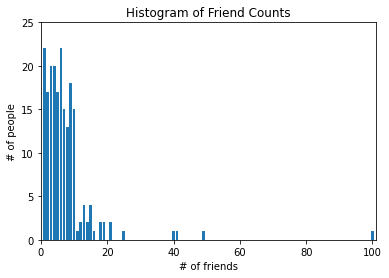

In [79]:
# Generate synthetic data
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friend_counts = Counter(num_friends)

xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.show()


In [80]:
num_points = len(num_friends)
print(num_points)

204


# Central Tendencies

In [81]:
def mean(v):
  """finds the 'average' value of v"""
  return sum(v)/len(v)
  
def median(v):
  """finds the 'middle-most' value of v"""
  n = len(v)
  sorted_v = sorted(v)
  midpoint = n // 2
  if n % 2 == 1:
  # if odd, return the middle value
    return sorted_v[midpoint]
  else:
    # if even, return the average of the middle values
    lo = midpoint - 1
    hi = midpoint
    return (sorted_v[lo] + sorted_v[hi]) / 2


In [82]:
mean(num_friends)

7.333333333333333

In [83]:
median(num_friends)

6.0

In [84]:
def quantile(x, p):
  """returns the pth-percentile value in x"""
  p_index = int(p * len(x))
  return sorted(x)[p_index]


In [85]:
quantile(num_friends, 0.10) # 1


1

In [86]:
quantile(num_friends, 0.25) # 3

3

In [87]:
quantile(num_friends, 0.75) # 9

9

In [88]:
quantile(num_friends, 0.90) # 13

13

In [89]:
def mode(x):
  """returns a list, might be more than one mode"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[6, 1]

## Dispersion

In [90]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
  return max(x) - min(x)
data_range(num_friends) # 99

99

In [91]:
def de_mean(x):
  """translate x by subtracting its mean (so the result has mean 0)"""
  x_bar = mean(x)
  return [x_i - x_bar for x_i in x]

def variance(x):
  """assumes x has at least two elements"""
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n - 1)

variance(num_friends) # 81.54

81.54351395730716

In [92]:
def standard_deviation(x):
  return math.sqrt(variance(x))
standard_deviation(num_friends) # 9.03

9.03014473623248

In [93]:
def interquartile_range(x):
  return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends) # 6

6

# Correlation

In [94]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

In [95]:
len(daily_minutes)

204

In [96]:
def covariance(x, y):
  n = len(x)
  return dot(de_mean(x), de_mean(y)) / (n - 1)


In [97]:
covariance(num_friends, daily_minutes) # 22.43

22.425435139573064

In [98]:
def correlation(x, y):
  stdev_x = standard_deviation(x)
  stdev_y = standard_deviation(y)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(x, y) / (stdev_x * stdev_y)
  else:
    return 0 # if no variation, correlation is zero


In [99]:
correlation(num_friends, daily_minutes) # 0.25

0.24736957366478216

In [100]:
import numpy as np
np.corrcoef(num_friends, daily_minutes)

array([[1.        , 0.24736957],
       [0.24736957, 1.        ]])

# Correlation after removing the Outlier

Text(0, 0.5, 'Daily Minutes Spent')

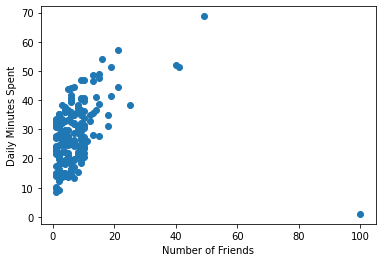

In [101]:
plt.scatter(num_friends, daily_minutes)
plt.xlabel("Number of Friends")
plt.ylabel("Daily Minutes Spent")

In [102]:
'''
# Save friends data to a csv file
import pandas as pd
df = pd.DataFrame({"Numer of Friends": num_friends, "Daily Minutes Spent in Online Meetings": daily_minutes} )
df
df.info()
df.describe()
df.to_csv("Friends.csv")
'''

'\nimport pandas as pd\ndf = pd.DataFrame({"Numer of Friends": num_friends, "Daily Minutes Spent in Online Meetings": daily_minutes} )\ndf\ndf.info()\ndf.describe()\ndf.to_csv("Friends.csv")\n'

In [103]:
outlier = num_friends.index(100) # index of outlier
print(outlier)
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

0


Text(0, 0.5, 'Daily Minutes Spent')

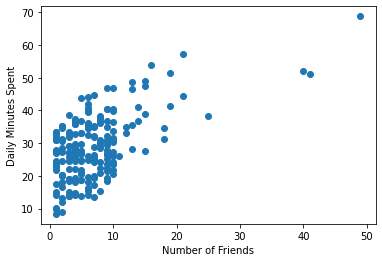

In [104]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.xlabel("Number of Friends")
plt.ylabel("Daily Minutes Spent")

In [105]:
correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

# Correlational Caveats

A correlation of zero indicates that there is no linear relationship between the two variables. However, there may be other sorts of relationships.
In the following example x and y have zero correlation. 

But they certainly have a relationship—each element of y equals the absolute value of the corresponding element of x.

What they don’t have is a relationship in which knowing how x_i compares to mean(x) gives us information about how y_i compares to mean(y). 
That is the sort of relationship that correlation looks for.


In [106]:
x = [-2, -1, 0, 1, 2]
y = [ 2, 1, 0, 1, 2]
correlation(x,y)

0.0

In [107]:
import numpy as np
x = [-2, -1, 0, 1, 2]
#y = [8, 9, 10, 11, 12]    # linear relationship y = x + 10

y = [14, 11, 10, 11, 14]   # y=x^2+10  # non linear relationship

correlation(x,y)

0.0

In addition, correlation tells you nothing about how strong the relationship is. The variables below are perfectly correlated, but (depending on what you’re measuring) it’s quite possible that this relationship isn’t all that interesting.

In [108]:
x = [-2, 1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]  # y = 100 + x/100
correlation(x,y)

0.8340576562281805